# Portfolio Allocation with Sharpe Ratio

In [2]:
import pandas as pd
import quandl

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [5]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)

In [9]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [11]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [13]:
#normalizing price
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [15]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [19]:
#30% in appl
#20% in cisco
#40% in amz
#10% in ibm
for stock_df, allo in zip((aapl, cisco, ibm, amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [20]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [21]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [23]:
aapl.tail()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2016-12-23,115.080808,2.177549,0.653265,653264.617079
2016-12-27,115.811668,2.191378,0.657413,657413.396830
2016-12-28,115.317843,2.182034,0.654610,654610.167268
2016-12-29,115.288214,2.181473,0.654442,654441.973495
2016-12-30,114.389454,2.164467,0.649340,649340.095692


In [24]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis = 1)

In [25]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [26]:
portfolio_val.columns = ['AAPL Pos', 'CSCO Pos', 'IBM Pos', 'AMZN Pos']

In [27]:
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [28]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [29]:
portfolio_val

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06
2012-01-10,308761.520317,202147.074611,389286.097692,100173.155337,1.000368e+06
2012-01-11,308258.152372,204723.564144,391454.643049,99927.386472,1.004364e+06
2012-01-12,307411.910610,205582.393988,387654.320988,98268.446629,9.989171e+05
2012-01-13,306259.270968,204616.210413,384669.887279,99659.274982,9.952046e+05


In [30]:
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

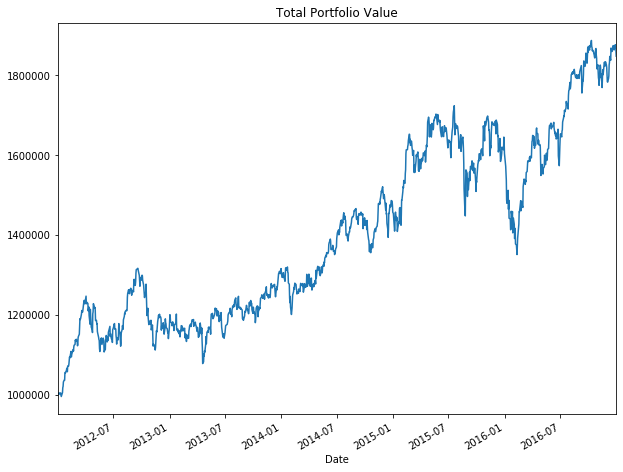

In [33]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

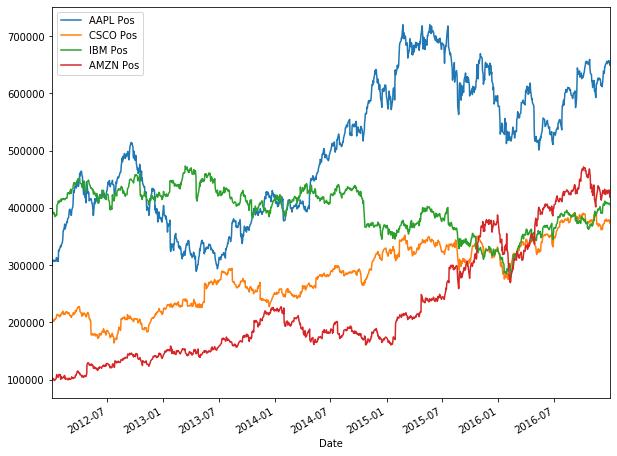

In [34]:
portfolio_val.drop('Total Pos', axis = 1).plot(figsize=(10,8))